In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [4]:
# ARIMA models

belgium_data = pd.read_csv("univariate_df_Belgium.csv")
chile_data = pd.read_csv("univariate_df_Chile.csv")
czechia_data = pd.read_csv("univariate_df_Czechia.csv")
estonia_data = pd.read_csv("univariate_df_Estonia.csv")
france_data = pd.read_csv("univariate_df_France.csv")
ireland_data = pd.read_csv("univariate_df_Ireland.csv")
israel_data = pd.read_csv("univariate_df_Israel.csv")
italy_data = pd.read_csv("univariate_df_Italy.csv")
malaysia_data = pd.read_csv("univariate_df_Malaysia.csv")
usa_data = pd.read_csv("univariate_df_United_States.csv")

In [7]:
def index_dt(c):
    c.set_index('date')

for x in [belgium_data, chile_data, czechia_data, estonia_data,france_data, ireland_data, israel_data, italy_data, malaysia_data, usa_data]:
    x = index_dt(x)  

for x in [belgium_data, chile_data, czechia_data, estonia_data,france_data, ireland_data, israel_data, italy_data, malaysia_data, usa_data]:
    x = x.sort_index()

In [8]:
! pip install pmdarima

## ARIMA

### Belgium ARIMA

In [9]:
##arima belgium
train_size = int(len(belgium_data) * 0.8)
belgium_train, belgium_test = belgium_data[0:train_size], belgium_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(belgium_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
3,1,4,2238.200299
7,2,4,2239.495220
11,3,4,2240.750981
15,4,4,2242.754329
13,4,2,2248.292003
10,3,3,2248.806847
6,2,3,2250.391333
14,4,3,2252.902045
8,3,1,2256.385498
4,2,1,2257.609463


In [10]:
model=ARIMA(belgium_train['new_deaths'],order=(1,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -903.745
Date:                Sat, 24 Feb 2024   AIC                           1819.491
Time:                        12:01:50   BIC                           1837.942
Sample:                             0   HQIC                          1826.983
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7094      0.043     16.685      0.000       0.626       0.793
ma.L1          0.4066      1.814      0.224      0.823      -3.148       3.961
ma.L2         -0.2815      2.542     -0.111      0.912      -5.263       4.700
ma.L3         -0.6186      2.033     -0.304      0.761      -4.602       3.365
ma.L4         -0.5056      0.915     -0.553      0.581      -2.299       1.288
sigma2      4574.9571   8254.392      0.554      0.579   -1.16e+04    2.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              2330.29
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             2.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

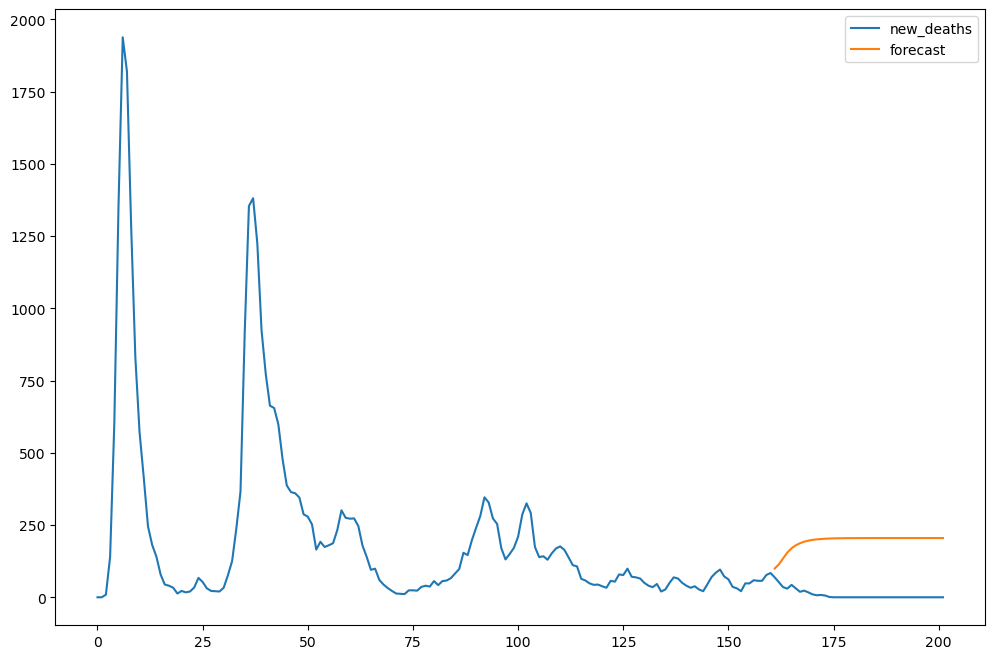

In [11]:
belgium_data['forecast']=model_fit.predict(start = len(belgium_train), end=len(belgium_train)+len(belgium_test)-1, dynamic=True)
belgium_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Chile ARIMA

In [12]:
##arima chile
train_size = int(len(chile_data) * 0.8)
chile_train, chile_test = chile_data[0:train_size], chile_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(chile_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
1,1,2,3291.576764
0,1,1,3292.814050
4,2,1,3293.148674
2,1,3,3293.241853
5,2,2,3293.511085
8,3,1,3293.917585
3,1,4,3295.026748
12,4,1,3295.228459
9,3,2,3295.428063
7,2,4,3297.222102


In [13]:
model=ARIMA(chile_train['new_deaths'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1324.605
Date:                Sat, 24 Feb 2024   AIC                           2657.211
Time:                        12:02:00   BIC                           2669.512
Sample:                             0   HQIC                          2662.206
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7743      0.345      2.246      0.025       0.099       1.450
ma.L1         -1.6626      0.363     -4.574      0.000      -2.375      -0.950
ma.L2          0.6628      0.365      1.816      0.069      -0.053       1.378
sigma2      8.869e+05   7.94e-07   1.12e+12      0.000    8.87e+05    8.87e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):            109339.15
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              30.46   Skew:                            10.76
Prob(H) (two-sided):                  0.00   Kurtosis:                       129.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.48e+27. Standard errors may be unstable.
"""

<AxesSubplot:>

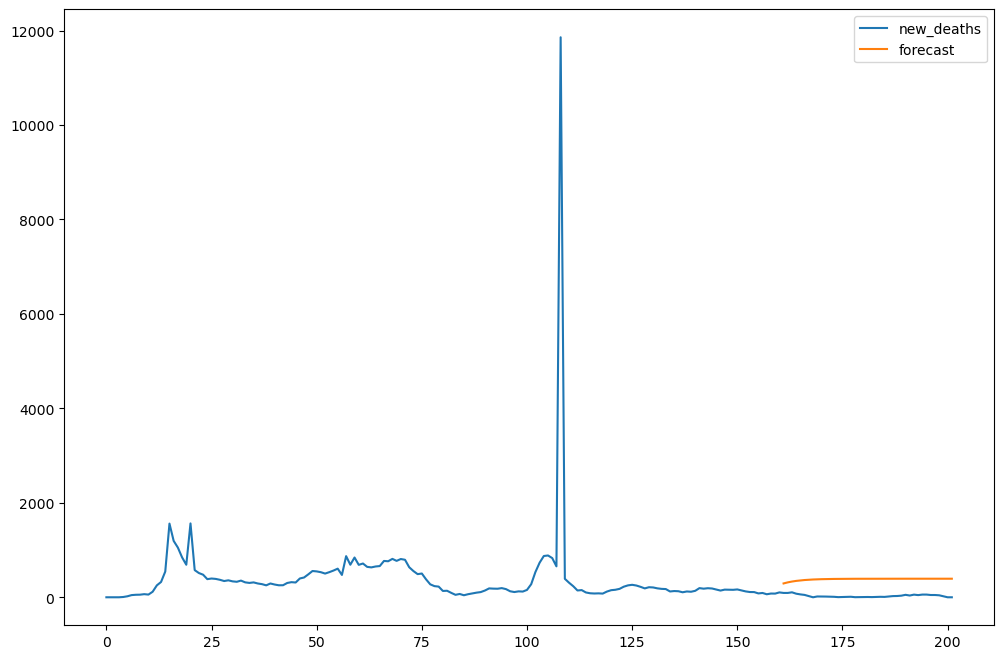

In [14]:
chile_data['forecast']=model_fit.predict(start = len(chile_train), end=len(chile_train)+len(chile_test)-1, dynamic=True)
chile_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Czechia ARIMA

In [15]:
##arima czech
train_size = int(len(czechia_data) * 0.8)
czechia_train, czechia_test = czechia_data[0:train_size], czechia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(czechia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
10,3,3,2222.349188
7,2,4,2222.596764
6,2,3,2222.854063
11,3,4,2224.030918
4,2,1,2225.865841
14,4,3,2225.920398
15,4,4,2226.172664
12,4,1,2226.477838
5,2,2,2227.505405
8,3,1,2227.677579


In [16]:
model=ARIMA(chile_train['new_deaths'],order=(3,1,3))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1326.767
Date:                Sat, 24 Feb 2024   AIC                           2667.535
Time:                        12:02:04   BIC                           2689.061
Sample:                             0   HQIC                          2676.276
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1913      4.997      0.038      0.969      -9.603       9.985
ar.L2         -1.0057      0.576     -1.747      0.081      -2.134       0.123
ar.L3          0.1047      0.158      0.660      0.509      -0.206       0.415
ma.L1         -1.0777      5.036     -0.214      0.831     -10.947       8.792
ma.L2          1.0851      5.007      0.217      0.828      -8.728      10.898
ma.L3         -0.9909      0.104     -9.496      0.000      -1.195      -0.786
sigma2      1.044e+06   7.42e-06   1.41e+11      0.000    1.04e+06    1.04e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            108399.45
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              25.82   Skew:                            10.75
Prob(H) (two-sided):                  0.00   Kurtosis:                       128.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+28. Standard errors may be unstable.
"""

<AxesSubplot:>

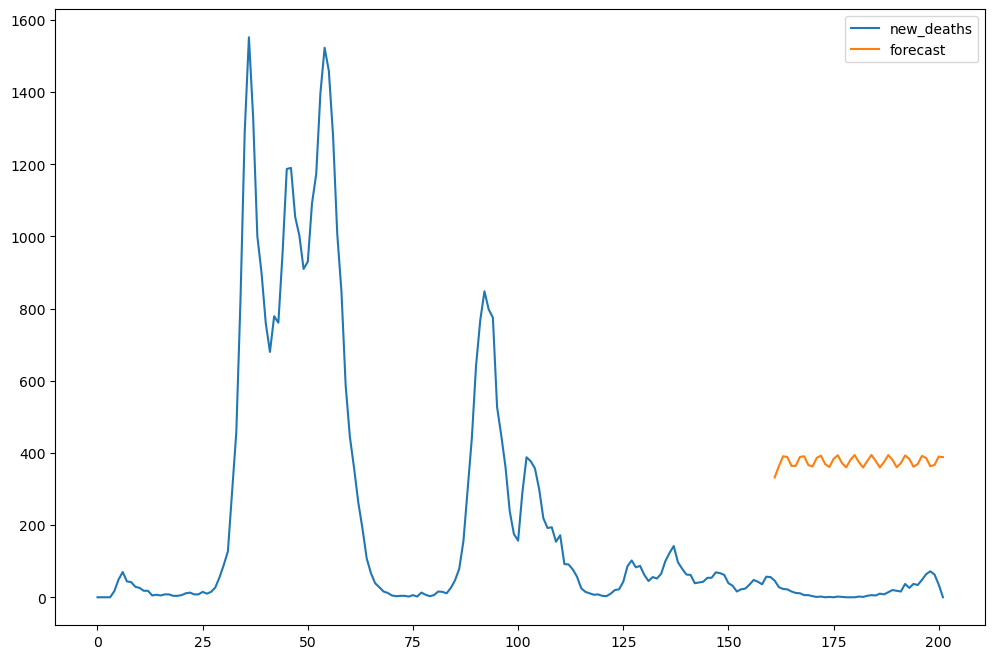

In [17]:
czechia_data['forecast']=model_fit.predict(start = len(czechia_train), end=len(czechia_train)+len(czechia_test)-1, dynamic=True)
czechia_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Estonia ARIMA

In [18]:
##arima estonia
train_size = int(len(estonia_data) * 0.8)
estonia_train, estonia_test = estonia_data[0:train_size], estonia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(estonia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,4,1566.802471
1,1,2,1566.866848
0,1,1,1567.447200
11,3,4,1568.705628
5,2,2,1568.817953
4,2,1,1568.912023
2,1,3,1569.108787
8,3,1,1569.201931
12,4,1,1569.333626
3,1,4,1569.553578


In [19]:
model=ARIMA(estonia_train['new_deaths'],order=(2,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -634.156
Date:                Sat, 24 Feb 2024   AIC                           1282.313
Time:                        12:02:08   BIC                           1303.839
Sample:                             0   HQIC                          1291.054
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5068      0.091    -16.515      0.000      -1.686      -1.328
ar.L2         -0.9080      0.079    -11.554      0.000      -1.062      -0.754
ma.L1          0.8551      0.202      4.229      0.000       0.459       1.251
ma.L2          0.1555      0.124      1.250      0.211      -0.088       0.399
ma.L3         -0.2415      0.140     -1.727      0.084      -0.516       0.033
ma.L4          0.2999      0.084      3.570      0.000       0.135       0.465
sigma2       160.7475     28.682      5.605      0.000     104.532     216.963
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               887.40
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

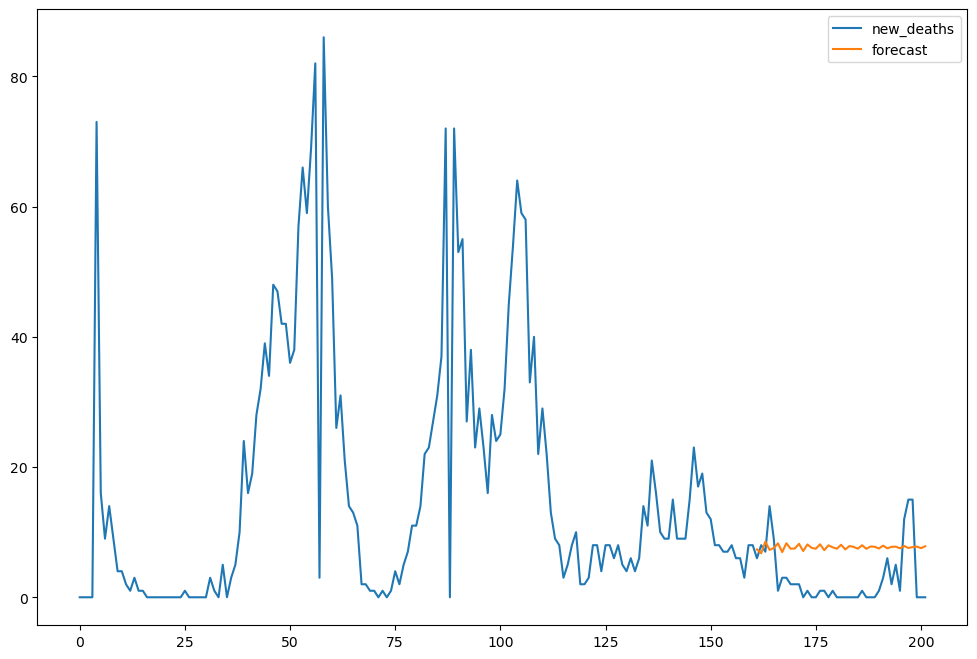

In [20]:
estonia_data['forecast']=model_fit.predict(start = len(estonia_train), end=len(estonia_train)+len(estonia_test)-1, dynamic=True)
estonia_data[['new_deaths','forecast']].plot(figsize=(12,8))

### France ARIMA

In [25]:
##arima france
train_size = int(len(france_data) * 0.8)
france_train, france_test = france_data[0:train_size], france_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(france_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
3,1,4,2662.682447
6,2,3,2663.098499
11,3,4,2663.890489
7,2,4,2664.412819
10,3,3,2664.451603
15,4,4,2665.882423
13,4,2,2666.216507
4,2,1,2666.261996
8,3,1,2666.350545
5,2,2,2667.377973


In [27]:
model=ARIMA(france_train['new_deaths'],order=(1,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -1072.290
Date:                Sat, 24 Feb 2024   AIC                           2156.581
Time:                        12:08:07   BIC                           2175.032
Sample:                             0   HQIC                          2164.073
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8912      0.032     27.624      0.000       0.828       0.954
ma.L1         -0.0080      0.126     -0.063      0.950      -0.255       0.240
ma.L2         -0.2413      0.095     -2.553      0.011      -0.427      -0.056
ma.L3         -0.4883      0.062     -7.889      0.000      -0.610      -0.367
ma.L4         -0.2624      0.060     -4.386      0.000      -0.380      -0.145
sigma2      3.801e+04   5.77e-06   6.59e+09      0.000     3.8e+04     3.8e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               140.47
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.9e+26. Standard errors may be unstable.
"""

<AxesSubplot:>

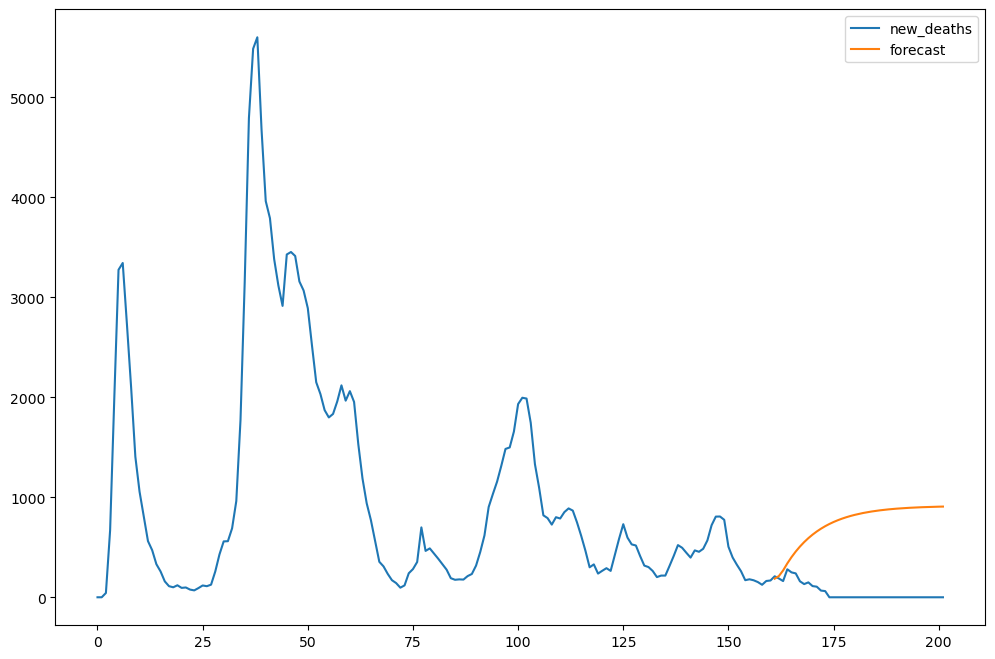

In [29]:
france_data['forecast']=model_fit.predict(start = len(france_train), end=len(france_train)+len(france_test)-1, dynamic=True)
france_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Ireland ARIMA

In [31]:
##arima ireland
train_size = int(len(ireland_data) * 0.8)
ireland_train, ireland_test = ireland_data[0:train_size], ireland_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(ireland_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
4,2,1,1804.382133
10,3,3,1805.239002
13,4,2,1805.593407
8,3,1,1805.982273
5,2,2,1806.045870
12,4,1,1807.212943
11,3,4,1807.229193
9,3,2,1807.352124
14,4,3,1807.374752
6,2,3,1807.485978


In [33]:
model=ARIMA(ireland_train['new_deaths'],order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -730.389
Date:                Sat, 24 Feb 2024   AIC                           1468.778
Time:                        12:10:43   BIC                           1481.078
Sample:                             0   HQIC                          1473.773
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5117      0.041     36.900      0.000       1.431       1.592
ar.L2         -0.6500      0.045    -14.504      0.000      -0.738      -0.562
ma.L1         -0.9998      3.603     -0.277      0.781      -8.062       6.062
sigma2       526.7563   1889.580      0.279      0.780   -3176.752    4230.265
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              2509.59
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             2.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

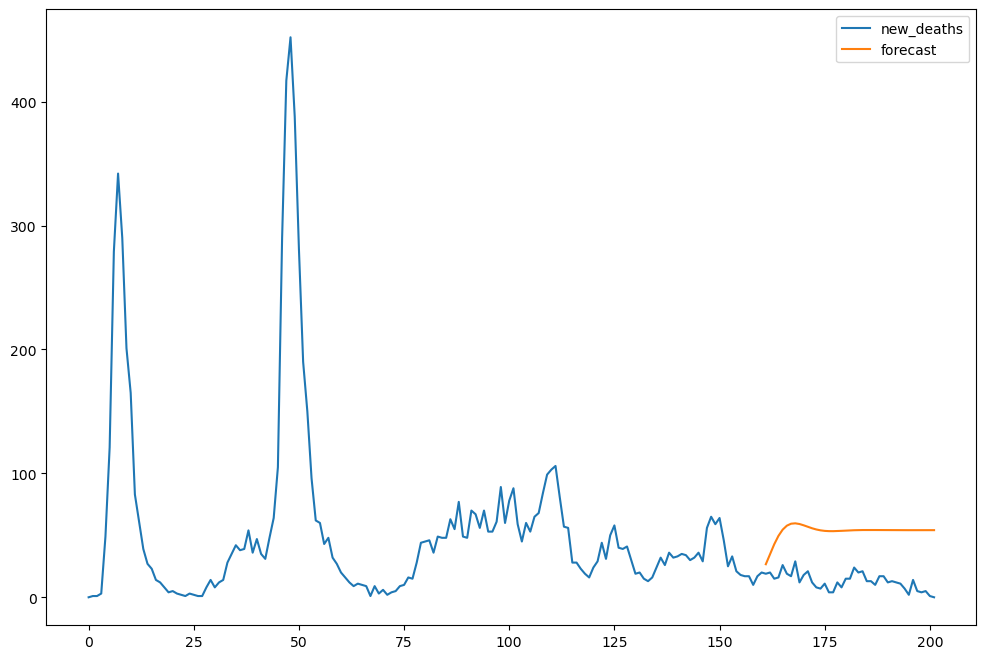

In [34]:
ireland_data['forecast']=model_fit.predict(start = len(ireland_train), end=len(ireland_train)+len(ireland_test)-1, dynamic=True)
ireland_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Italy ARIMA

In [35]:
##arima italy
train_size = int(len(italy_data) * 0.8)
italy_train, italy_test = italy_data[0:train_size], italy_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(italy_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
4,2,1,2789.606572
12,4,1,2790.044468
8,3,1,2790.789203
9,3,2,2791.937487
13,4,2,2792.485134
11,3,4,2793.278883
6,2,3,2793.435895
10,3,3,2796.022607
14,4,3,2796.347027
1,1,2,2798.088099


In [36]:
model=ARIMA(italy_train['new_deaths'],order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1124.739
Date:                Sat, 24 Feb 2024   AIC                           2257.478
Time:                        12:12:42   BIC                           2269.778
Sample:                             0   HQIC                          2262.473
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6152      0.027     60.253      0.000       1.563       1.668
ar.L2         -0.6860      0.022    -31.874      0.000      -0.728      -0.644
ma.L1         -0.9998      2.338     -0.428      0.669      -5.582       3.582
sigma2      7.311e+04    1.7e+05      0.430      0.667    -2.6e+05    4.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               553.13
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

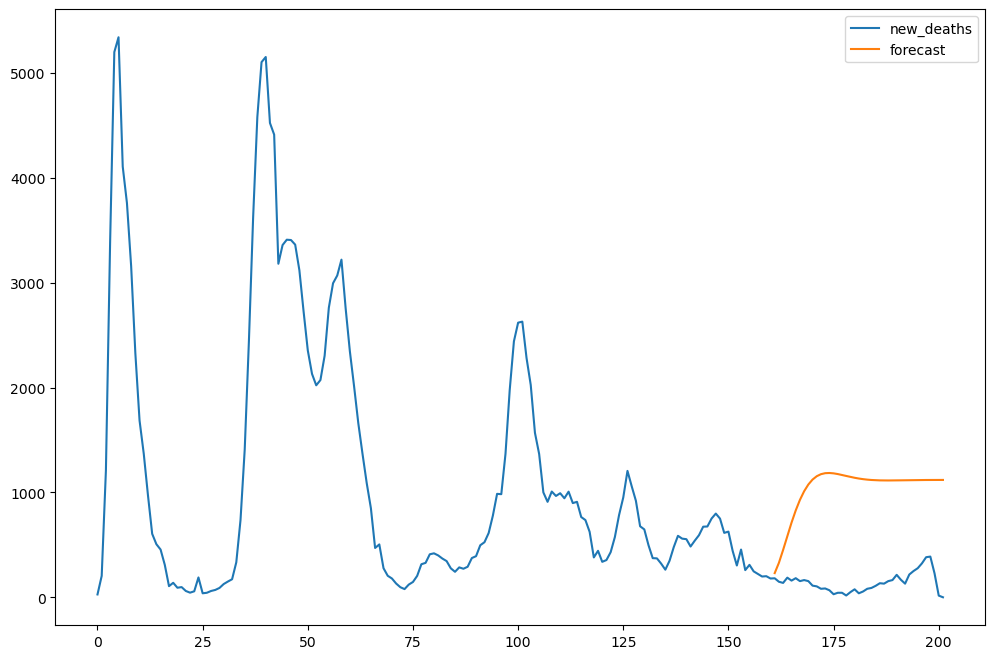

In [39]:
italy_data['forecast']=model_fit.predict(start = len(italy_train), end=len(italy_train)+len(italy_test)-1, dynamic=True)
italy_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Israel ARIMA

In [40]:
##arima israel
train_size = int(len(israel_data) * 0.8)
israel_train, israel_test = israel_data[0:train_size], israel_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(israel_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,4,1795.079455
3,1,4,1796.312625
4,2,1,1796.317371
14,4,3,1796.401340
11,3,4,1796.490658
15,4,4,1797.410405
6,2,3,1797.650310
10,3,3,1797.796405
8,3,1,1798.284487
5,2,2,1798.292273


In [42]:
model=ARIMA(israel_train['new_deaths'],order=(2,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -725.362
Date:                Sat, 24 Feb 2024   AIC                           1464.724
Time:                        12:17:49   BIC                           1486.250
Sample:                             0   HQIC                          1473.465
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2066      0.241      5.008      0.000       0.734       1.679
ar.L2         -0.3767      0.242     -1.554      0.120      -0.852       0.098
ma.L1         -0.6018      4.997     -0.120      0.904     -10.395       9.191
ma.L2         -0.0316      2.088     -0.015      0.988      -4.124       4.060
ma.L3         -0.1074      1.903     -0.056      0.955      -3.836       3.621
ma.L4         -0.2588      1.359     -0.190      0.849      -2.923       2.406
sigma2       495.3986   2508.821      0.197      0.843   -4421.801    5412.598
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               637.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

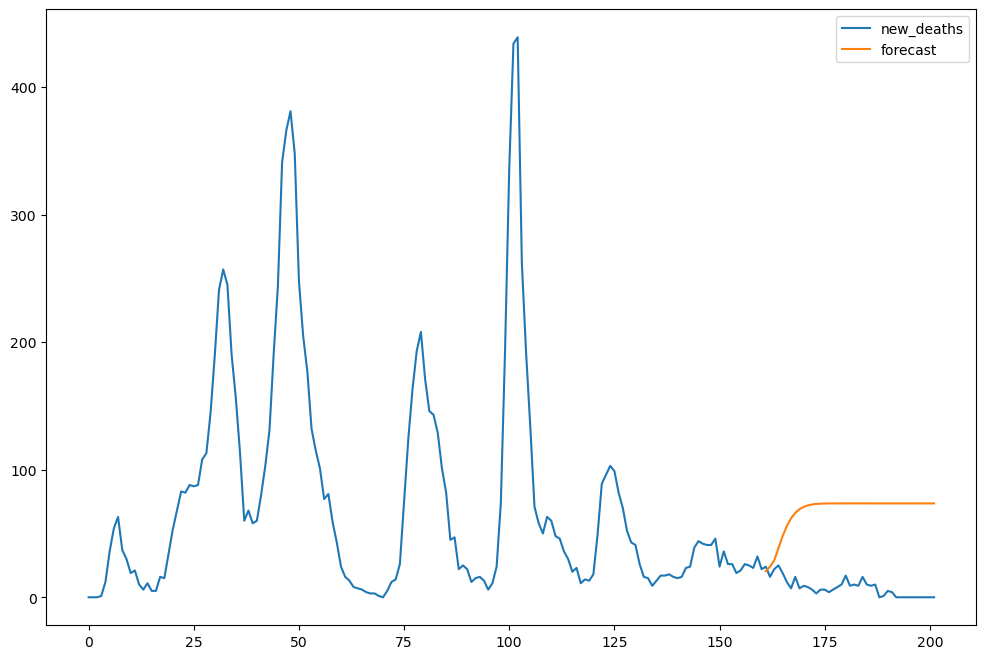

In [43]:
israel_data['forecast']=model_fit.predict(start = len(israel_train), end=len(israel_train)+len(israel_test)-1, dynamic=True)
israel_data[['new_deaths','forecast']].plot(figsize=(12,8))

### Malaysia ARIMA

In [44]:
##arima malaysia
train_size = int(len(malaysia_data) * 0.8)
malaysia_train, malaysia_test = malaysia_data[0:train_size], malaysia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(malaysia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
11,3,4,2358.308353
9,3,2,2358.636026
15,4,4,2358.680575
6,2,3,2359.117394
13,4,2,2360.592947
10,3,3,2360.599094
7,2,4,2360.682427
5,2,2,2360.819541
14,4,3,2362.067572
3,1,4,2364.182719


In [45]:
model=ARIMA(israel_train['new_deaths'],order=(3,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -725.163
Date:                Sat, 24 Feb 2024   AIC                           1466.325
Time:                        12:20:05   BIC                           1490.926
Sample:                             0   HQIC                          1476.315
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9871      0.566      1.744      0.081      -0.122       2.097
ar.L2         -0.0197      0.906     -0.022      0.983      -1.795       1.755
ar.L3         -0.1639      0.437     -0.375      0.708      -1.020       0.692
ma.L1         -0.3858      1.690     -0.228      0.819      -3.698       2.926
ma.L2         -0.2461      1.087     -0.226      0.821      -2.376       1.884
ma.L3         -0.0943      0.634     -0.149      0.882      -1.338       1.149
ma.L4         -0.2727      0.485     -0.562      0.574      -1.224       0.679
sigma2       494.1933    772.971      0.639      0.523   -1020.802    2009.188
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               646.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

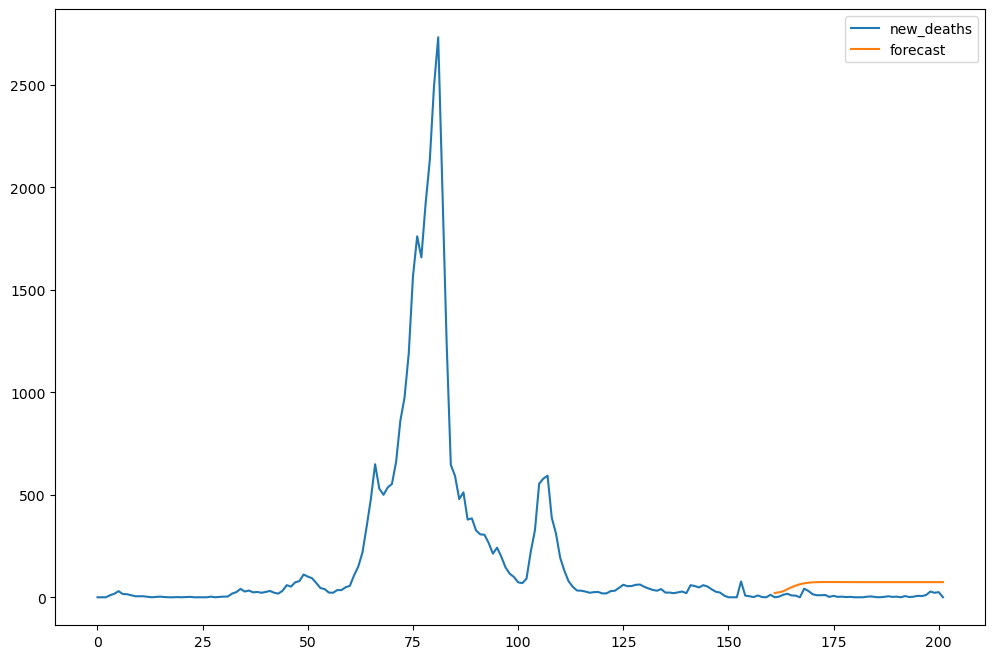

In [46]:
malaysia_data['forecast']=model_fit.predict(start = len(malaysia_train), end=len(malaysia_train)+len(malaysia_test)-1, dynamic=True)
malaysia_data[['new_deaths','forecast']].plot(figsize=(12,8))

### USA ARIMA

In [47]:
##arima us
train_size = int(len(usa_data) * 0.8)
usa_train, usa_test = usa_data[0:train_size], usa_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(usa_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
8,3,1,3423.116149
6,2,3,3423.487158
12,4,1,3423.662124
7,2,4,3425.559635
9,3,2,3427.055647
11,3,4,3427.853197
10,3,3,3429.672760
5,2,2,3430.174429
13,4,2,3431.366169
1,1,2,3431.486887


In [48]:
model=ARIMA(israel_train['new_deaths'],order=(3,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -728.609
Date:                Sat, 24 Feb 2024   AIC                           1467.219
Time:                        12:21:43   BIC                           1482.594
Sample:                             0   HQIC                          1473.462
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5884      0.089     17.761      0.000       1.413       1.764
ar.L2         -0.7062      0.160     -4.409      0.000      -1.020      -0.392
ar.L3          0.0094      0.116      0.081      0.936      -0.217       0.236
ma.L1         -0.9807      0.057    -17.131      0.000      -1.093      -0.869
sigma2       520.7843     30.837     16.888      0.000     460.345     581.224
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               801.44
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

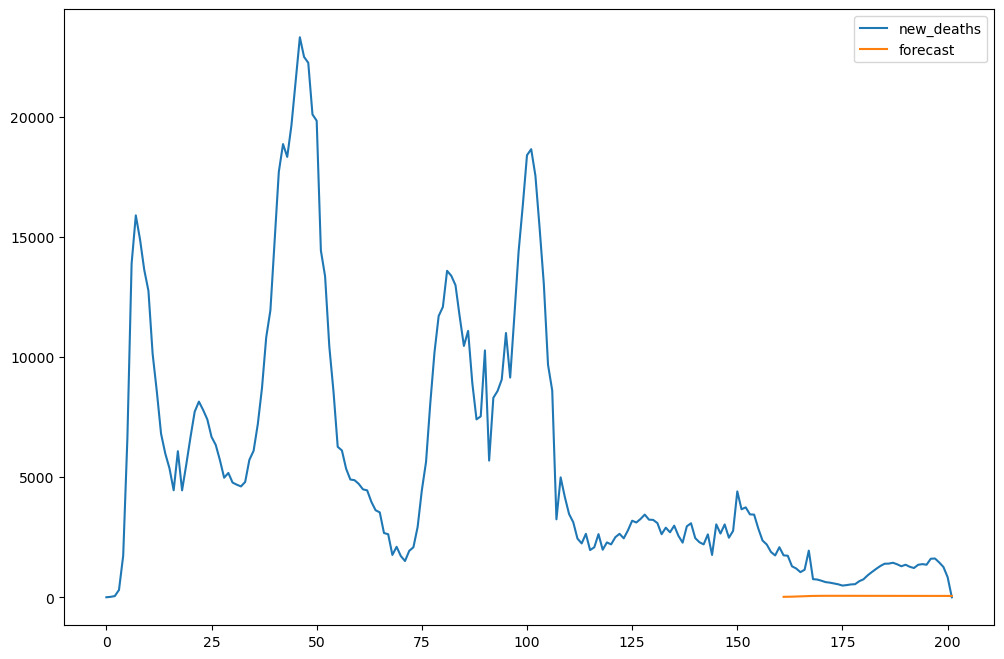

In [49]:
usa_data['forecast']=model_fit.predict(start = len(usa_train), end=len(usa_train)+len(usa_test)-1, dynamic=True)
usa_data[['new_deaths','forecast']].plot(figsize=(12,8))